In [1]:
#El que volem comprovar amb el nostre projecte és la quantitat de sèries renovades, de cada plataforma de streaming, ordenat per
#gènere per veurà quins generes són els més demandats.

#Primer de tot importarem biblioteques necessàries perquè funcionin les nostres comandes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Ara carreguarem els CSV necessàris per les nostres comprobacions 

#primer carreguarem el de amazon prime
df_ap = pd.read_csv('amazon_prime_titles.csv')

#despres carreguarem el de disney plus
df_dp = pd.read_csv('disney_plus_titles.csv')

#per ultim carreguarem el de netflix
df_n = pd.read_csv('netflix_titles.csv')

df_imdb_top_1000 = pd.read_csv('imdb_top_1000.csv')

df_series_data = pd.read_csv('series_data.csv')

In [4]:
df_ap.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [3]:
len(df_ap)

9668

In [3]:
df_imdb_top_1000.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df_series_data.head()

,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,(1994–2004),13+,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,829816
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,(2016– ),15,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,824966


In [5]:
#Comprobarem que hi hagi informacio a dins de ells
#Primer Amazon Prime
df_ap.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [6]:
#Despres Disney Plus
df_dp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [7]:
#I per ultim Netflix
df_n.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
#Hem comprobat que hi han dades als CSV y ara probarem de filtrar per buscar nomes per que nomes mostri series de televisio
#Primer efectuarem la seguent comanda per filtrar a la columna "type"
#Primer de Amazon
Series_de_Amazon = df_ap.type.str.contains('TV Show')

In [9]:
#Segidament de Netflix
Series_de_Netflix = df_n.type.str.contains('TV Show')

In [10]:
#Per ultim Disney
Series_de_Disney = df_dp.type.str.contains('TV Show')

In [11]:
#Ara mirarem que el flitra s'hagi efectuat correctament
#Amazon Prime
df_ap.loc[Series_de_Amazon].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
17,s18,TV Show,Zoo Babies,NaN,Narrator - Gillian Barlett,NaN,NaN,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...
18,s19,TV Show,Zoë Coombs Marr: Bossy Bottom,NaN,Zoë Coombs Marr,NaN,NaN,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...
20,s21,TV Show,Zoboomafoo,NaN,NaN,NaN,NaN,2001,TV-Y,1 Season,Kids,Chris and Martin Kratt bring their enthusiasm ...
21,s22,TV Show,Zo Zo Zombie: Mini-Series,NaN,"Alex Cazares, Ben Diskin, Cristina Vee, Erika ...",NaN,NaN,2020,TV-Y7,1 Season,"Action, Anime, Comedy","Zo Zo Zombie is our undead hero who, with his ..."
23,s24,TV Show,ZeroZeroZero,NaN,"ANDREA RISEBOROUGH, HAROLD TORRES, CLAUDIA PIN...",Italy,NaN,2020,18+,1 Season,TV Shows,ZeroZeroZero series follows the journey of a c...


In [12]:
#Netflix
df_n.loc[Series_de_Netflix].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [13]:
#Disney Plus
df_dp.loc[Series_de_Disney].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet",NaN,"Dr. Michelle Oakley, Zachary Fine",United States,"November 17, 2021",2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."


In [14]:
#Aqui sobre escribimos los filtros para filtrar por peliculas

#DISNEY PLUS
dp_movies = df_dp[df_dp.type != "TV Show"]
#dp_movies = dp_movies[dp_movies.release_year == 2016]
dp_series = df_dp[df_dp.type != "Movie"]

#AMAZON PRIME
ap_movies = df_ap[df_ap.type != "TV Show"]
#ap_movies = ap_movies[ap_movies.release_year == 2016]
ap_series = df_ap[df_ap.type != "Movie"]

#NETFLIX
n_movies = df_n[df_n.type != "TV Show"]
#n_movies = n_movies[n_movies.release_year == 2016]
n_series = df_n[df_n.type != "Movie"]

In [15]:
#Aqui usando "duration" hacemos que el tiempo de durada se pase a un string y luego lo forzamos a que se 
#combierta en un INT, para poder filtrar por el.

#Diseney Plus
dp_movies['duration'] = dp_movies['duration'].str.extract(pat='(\d+)', expand=False)
dp_movies['duration'] = dp_movies['duration'].astype(int)
dp_movies.head()

C:\Users\mruiz\AppData\Local\Temp\ipykernel_12204\2370866454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_movies['duration'] = dp_movies['duration'].str.extract(pat='(\d+)', expand=False)
C:\Users\mruiz\AppData\Local\Temp\ipykernel_12204\2370866454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_movies['duration'] = dp_movies['duration'].astype(int)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94,"Biographical, Documentary",An inside look at the legendary life of advent...


In [16]:
#Aqui usando "duration" hacemos que el tiempo de durada se pase a un string y luego lo forzamos a que se 
#combierta en un INT, para poder filtrar por el.

#Amazon Prime
ap_movies['duration'] = ap_movies['duration'].str.extract(pat='(\d+)', expand=False)
ap_movies['duration'] = ap_movies['duration'].astype(int)
ap_movies.head()

C:\Users\mruiz\AppData\Local\Temp\ipykernel_12204\2454436129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_movies['duration'] = ap_movies['duration'].str.extract(pat='(\d+)', expand=False)
C:\Users\mruiz\AppData\Local\Temp\ipykernel_12204\2454436129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_movies['duration'] = ap_movies['duration'].astype(int)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [17]:
n_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [18]:
n_movies["duration"] = n_movies["duration"].str.extract(pat="(\d+)", expand=False)

C:\Users\mruiz\AppData\Local\Temp\ipykernel_12204\3742690420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_movies["duration"] = n_movies["duration"].str.extract(pat="(\d+)", expand=False)


In [19]:
n_movies = n_movies[n_movies.duration != None]

In [20]:
#n_movies["duration"] = n_movies["duration"].astype(str).astype(int)
i = 0

for x in n_movies["duration"]:
    i+= 1
    print(i)
    print(x)
    print(type(x))
    x = pd.to_numeric(x, downcast="float")
    print(type(x))

1
90
<class 'str'>
<class 'numpy.float32'>
2
91
<class 'str'>
<class 'numpy.float32'>
3
125
<class 'str'>
<class 'numpy.float32'>
4
104
<class 'str'>
<class 'numpy.float32'>
5
127
<class 'str'>
<class 'numpy.float32'>
6
91
<class 'str'>
<class 'numpy.float32'>
7
67
<class 'str'>
<class 'numpy.float32'>
8
94
<class 'str'>
<class 'numpy.float32'>
9
161
<class 'str'>
<class 'numpy.float32'>
10
61
<class 'str'>
<class 'numpy.float32'>
11
166
<class 'str'>
<class 'numpy.float32'>
12
147
<class 'str'>
<class 'numpy.float32'>
13
103
<class 'str'>
<class 'numpy.float32'>
14
97
<class 'str'>
<class 'numpy.float32'>
15
106
<class 'str'>
<class 'numpy.float32'>
16
111
<class 'str'>
<class 'numpy.float32'>
17
110
<class 'str'>
<class 'numpy.float32'>
18
105
<class 'str'>
<class 'numpy.float32'>
19
96
<class 'str'>
<class 'numpy.float32'>
20
124
<class 'str'>
<class 'numpy.float32'>
21
116
<class 'str'>
<class 'numpy.float32'>
22
98
<class 'str'>
<class 'numpy.float32'>
23
91
<class 'str'>
<class '

<class 'numpy.float32'>
5538
93
<class 'str'>
<class 'numpy.float32'>
5539
103
<class 'str'>
<class 'numpy.float32'>
5540
88
<class 'str'>
<class 'numpy.float32'>
5541
86
<class 'str'>
<class 'numpy.float32'>
5542
88
<class 'str'>
<class 'numpy.float32'>
5543
152
<class 'str'>
<class 'numpy.float32'>
5544
106
<class 'str'>
<class 'numpy.float32'>
5545
52
<class 'str'>
<class 'numpy.float32'>
5546
98
<class 'str'>
<class 'numpy.float32'>
5547
89
<class 'str'>
<class 'numpy.float32'>
5548
86
<class 'str'>
<class 'numpy.float32'>
5549
106
<class 'str'>
<class 'numpy.float32'>
5550
100
<class 'str'>
<class 'numpy.float32'>
5551
91
<class 'str'>
<class 'numpy.float32'>
5552
113
<class 'str'>
<class 'numpy.float32'>
5553
100
<class 'str'>
<class 'numpy.float32'>
5554
132
<class 'str'>
<class 'numpy.float32'>
5555
96
<class 'str'>
<class 'numpy.float32'>
5556
96
<class 'str'>
<class 'numpy.float32'>
5557
113
<class 'str'>
<class 'numpy.float32'>
5558
95
<class 'str'>
<class 'numpy.float32'>
5

In [21]:
llista = n_movies["duration"].tolist()

In [22]:
llista

['90',
 '91',
 '125',
 '104',
 '127',
 '91',
 '67',
 '94',
 '161',
 '61',
 '166',
 '147',
 '103',
 '97',
 '106',
 '111',
 '110',
 '105',
 '96',
 '124',
 '116',
 '98',
 '91',
 '23',
 '115',
 '122',
 '99',
 '99',
 '88',
 '100',
 '102',
 '93',
 '96',
 '95',
 '85',
 '97',
 '95',
 '83',
 '103',
 '113',
 '13',
 '182',
 '106',
 '48',
 '145',
 '145',
 '93',
 '106',
 '147',
 '87',
 '96',
 '95',
 '92',
 '91',
 '90',
 '97',
 '80',
 '117',
 '128',
 '90',
 '119',
 '110',
 '143',
 '119',
 '114',
 '94',
 '106',
 '99',
 '118',
 '115',
 '95',
 '115',
 '108',
 '63',
 '117',
 '121',
 '142',
 '113',
 '154',
 '95',
 '108',
 '120',
 '100',
 '82',
 '124',
 '114',
 '104',
 '94',
 '94',
 '93',
 '97',
 '109',
 '88',
 '101',
 '105',
 '102',
 '101',
 '103',
 '106',
 '118',
 '86',
 '121',
 '229',
 '76',
 '95',
 '98',
 '89',
 '120',
 '110',
 '83',
 '121',
 '105',
 '94',
 '156',
 '112',
 '95',
 '107',
 '114',
 '129',
 '86',
 '97',
 '125',
 '107',
 '127',
 '128',
 '92',
 '135',
 '124',
 '136',
 '165',
 '124',
 '136',

In [23]:
#Aqui usando "duration" hacemos que el tiempo de durada se pase a un string y luego lo forzamos a que se 
#combierta en un INT, para poder filtrar por el.

#Netflix
n_movies['duration'] = n_movies['duration'].str.extract(pat='(\d+)', expand=False)
n_movies['duration'] = n_movies['duration'].astype(float)
n_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...


In [24]:
llista = list(zip(dp_movies['release_year'], dp_movies['duration'])) 
diccionari = {}

for x in llista:
    #print (x[0], x[1])
    if x[0] not in diccionari:
        diccionari[x[0]] = x[1]
    else:
        diccionari[x[0]] += x[1]

dict(sorted(diccionari.items(), key=lambda item: item[0]))

{1928: 8,
 1932: 23,
 1933: 26,
 1934: 35,
 1935: 39,
 1936: 53,
 1937: 128,
 1938: 41,
 1939: 44,
 1940: 344,
 1941: 124,
 1942: 111,
 1943: 50,
 1944: 9,
 1945: 72,
 1946: 15,
 1947: 102,
 1948: 104,
 1949: 97,
 1950: 226,
 1951: 127,
 1952: 181,
 1953: 201,
 1954: 212,
 1955: 332,
 1956: 351,
 1957: 260,
 1959: 507,
 1960: 295,
 1961: 503,
 1962: 227,
 1963: 208,
 1964: 359,
 1965: 423,
 1966: 144,
 1967: 281,
 1968: 107,
 1969: 434,
 1970: 81,
 1971: 300,
 1972: 275,
 1973: 85,
 1974: 357,
 1975: 380,
 1976: 305,
 1977: 487,
 1978: 324,
 1979: 375,
 1980: 360,
 1981: 283,
 1982: 96,
 1983: 161,
 1984: 236,
 1985: 479,
 1986: 399,
 1987: 490,
 1988: 374,
 1989: 272,
 1990: 360,
 1991: 384,
 1992: 719,
 1993: 1112,
 1994: 969,
 1995: 1125,
 1996: 1100,
 1997: 1086,
 1998: 1554,
 1999: 1734,
 2000: 1918,
 2001: 1352,
 2002: 1738,
 2003: 2369,
 2004: 2046,
 2005: 2540,
 2006: 2407,
 2007: 1927,
 2008: 1869,
 2009: 2627,
 2010: 2080,
 2011: 2821,
 2012: 1928,
 2013: 1258,
 2014: 2309,
 

In [25]:
llista = list(zip(ap_movies['release_year'], ap_movies['duration'])) 
diccionari = {}

for x in llista:
    #print (x[0], x[1])
    if x[0] not in diccionari:
        diccionari[x[0]] = x[1]
    else:
        diccionari[x[0]] += x[1]

dict(sorted(diccionari.items(), key=lambda item: item[0]))

{1920: 216,
 1922: 266,
 1923: 113,
 1924: 118,
 1925: 651,
 1926: 113,
 1927: 65,
 1929: 329,
 1930: 375,
 1931: 251,
 1932: 473,
 1933: 364,
 1934: 786,
 1935: 911,
 1936: 2060,
 1937: 1663,
 1938: 1069,
 1939: 1540,
 1940: 1252,
 1941: 1673,
 1942: 1302,
 1943: 1874,
 1944: 874,
 1945: 940,
 1946: 1672,
 1947: 1867,
 1948: 1281,
 1949: 1168,
 1950: 1711,
 1951: 1600,
 1952: 1386,
 1953: 1637,
 1954: 1132,
 1955: 911,
 1956: 1521,
 1957: 441,
 1958: 1350,
 1959: 1502,
 1960: 1047,
 1961: 887,
 1962: 1322,
 1963: 1926,
 1964: 1422,
 1965: 1206,
 1966: 1147,
 1967: 1657,
 1968: 1920,
 1969: 1402,
 1970: 2488,
 1971: 1700,
 1972: 1904,
 1973: 1791,
 1974: 2117,
 1975: 2666,
 1976: 1150,
 1977: 1310,
 1978: 1848,
 1979: 1607,
 1980: 2640,
 1981: 2042,
 1982: 1747,
 1983: 1673,
 1984: 2722,
 1985: 2874,
 1986: 3681,
 1987: 3189,
 1988: 4045,
 1989: 3800,
 1990: 3836,
 1991: 4516,
 1992: 5132,
 1993: 5620,
 1994: 5379,
 1995: 6412,
 1996: 5956,
 1997: 5195,
 1998: 5125,
 1999: 5369,
 2000:

In [26]:
llista = list(zip(n_movies['release_year'], n_movies['duration'])) 
diccionari = {}

for x in llista:
    #print (x[0], x[1])
    if x[0] not in diccionari:
        diccionari[x[0]] = x[1]
    else:
        diccionari[x[0]] += x[1]

dict(sorted(diccionari.items(), key=lambda item: item[0]))

{1942: 70.0,
 1943: 188.0,
 1944: 156.0,
 1945: 154.0,
 1946: 58.0,
 1947: 42.0,
 1954: 236.0,
 1955: 301.0,
 1956: 202.0,
 1958: 296.0,
 1959: 143.0,
 1960: 574.0,
 1961: 156.0,
 1962: 501.0,
 1963: 194.0,
 1964: 401.0,
 1965: 303.0,
 1966: 116.0,
 1967: 421.0,
 1968: 449.0,
 1969: 280.0,
 1970: 196.0,
 1971: 714.0,
 1972: 435.0,
 1973: 1231.0,
 1974: 685.0,
 1975: 780.0,
 1976: 1142.0,
 1977: 801.0,
 1978: 661.0,
 1979: 1225.0,
 1980: 1316.0,
 1981: 1513.0,
 1982: 2124.0,
 1983: 1214.0,
 1984: 1646.0,
 1985: 1032.0,
 1986: 1206.0,
 1987: 802.0,
 1988: 1669.0,
 1989: 1658.0,
 1990: 2216.0,
 1991: 1376.0,
 1992: 2080.0,
 1993: 2798.0,
 1994: 2460.0,
 1995: 2622.0,
 1996: 2596.0,
 1997: 3987.0,
 1998: 3485.0,
 1999: 3816.0,
 2000: 3665.0,
 2001: 4616.0,
 2002: 5260.0,
 2003: 5930.0,
 2004: 6288.0,
 2005: 7633.0,
 2006: 9267.0,
 2007: 8379.0,
 2008: 12005.0,
 2009: 12856.0,
 2010: nan,
 2011: 14916.0,
 2012: 17431.0,
 2013: 22061.0,
 2014: 26469.0,
 2015: nan,
 2016: 62747.0,
 2017: nan,

<AxesSubplot: xlabel='release_year'>

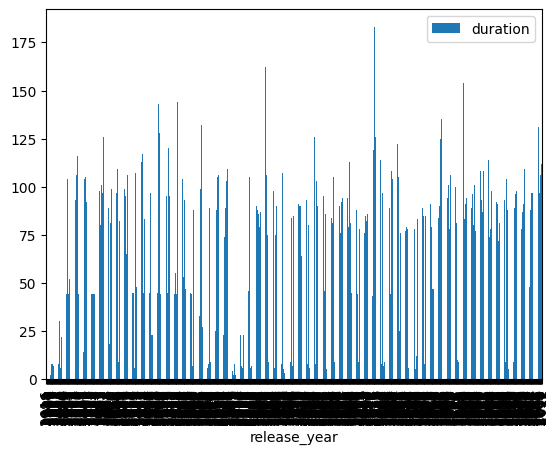

In [28]:
#Con esto mostramos las peliculas de disney plus que mas duran

dp_movies.plot(kind='bar', y='duration', x='release_year')
#groupby_DP=dp_movies.groupby(by="release_year").mean()
#dp_movies.plot(kind='bar', y='duration', x='groupby_DP')
#promig=dp_movies['duration'].groupby('release_year').mean()

<AxesSubplot: xlabel='release_year'>

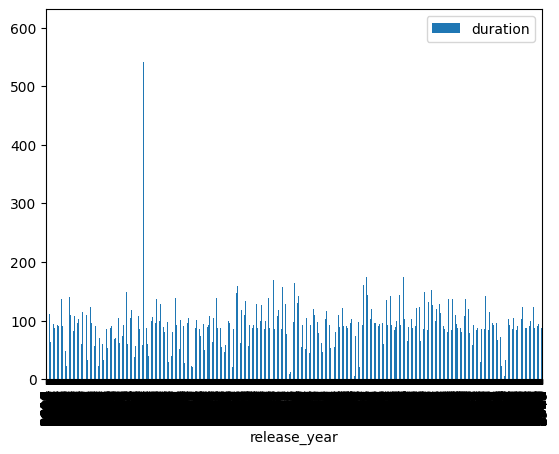

In [29]:
#Con esto mostramos las peliculas de disney plus que mas duran

ap_movies.plot(kind='bar', y='duration', x='release_year')

<AxesSubplot: xlabel='release_year'>

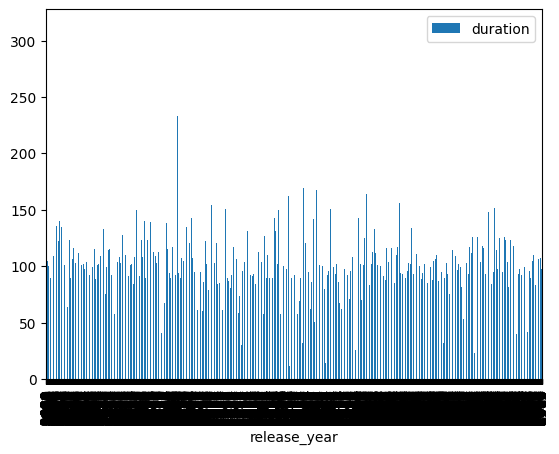

In [30]:
n_movies.plot(kind='bar', y='duration', x='release_year')